# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
titanic_data=pd.read_csv('E:\Personal\DataScience\MachineLearning\Lesson 3 Practice\Titanic_data.csv')

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


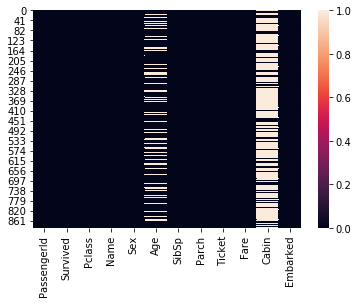

In [9]:
sns.heatmap(titanic_data.isnull())

# EDA
1.Check if any missing values

In [61]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#titanic_data.isnull() --> this prints the value of each data in every row and column as T and F

#titanic_data.isnull().sum() #--> This shows the number of null values present in a data set.

titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

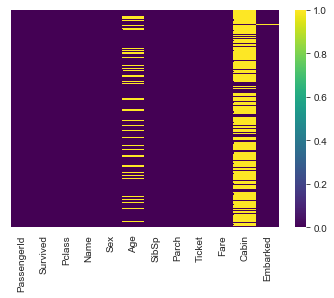

In [62]:
#showing the null values using heatmap
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='viridis')

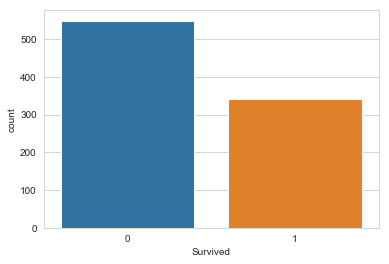

In [31]:
#The below helps in setting a counter plot for a particular column of data. Here we are seeing how many persons survived and killed 
#0-->Not Survived, 1--> Survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_data)

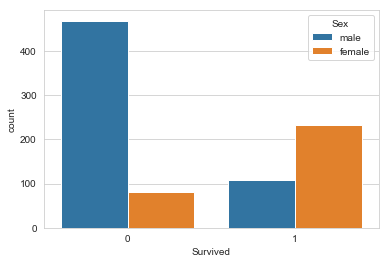

In [34]:
#here we are adding one more filter based on the sex
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

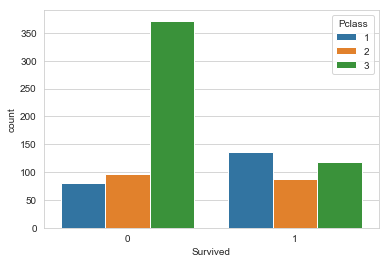

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

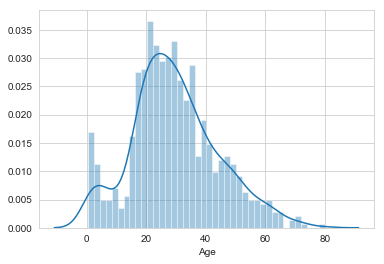

In [39]:
sns.distplot(titanic_data['Age'],bins=40)

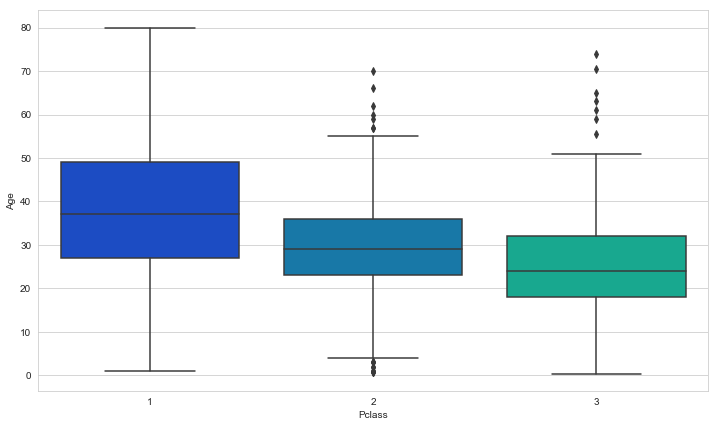

In [45]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age', data=titanic_data,palette='winter')

In [46]:
def age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 28
        else:
            return 25
    else:
        return Age
        
            

In [63]:
titanic_data['Age']=titanic_data[['Age','Pclass']].apply(age,axis=1)
titanic_data.drop('Cabin', inplace=True, axis=1)

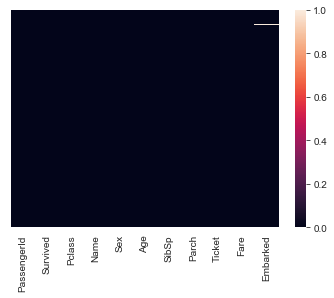

In [64]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

In [66]:
Embarked=pd.get_dummies(titanic_data['Embarked'])
Embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [67]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)

In [68]:
titanic_data.drop(['Sex','Embarked','Name','Ticket'],inplace=True,axis=1)

In [69]:
titanic_data=pd.concat([titanic_data,sex,embark],axis=1)

In [70]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [71]:
titanic_data.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [72]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [73]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,x_test, Y_train, y_test=train_test_split(titanic_data.drop('Survived',axis=1),titanic_data['Survived'],
                                                test_size=0.30,random_state=101)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

C:\Users\vishal.kumar1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
predictions=logmodel.predict(x_test)

In [80]:
from sklearn.metrics import confusion_matrix

In [82]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[134,  20],
       [ 41,  73]], dtype=int64)

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7723880597014925

In [85]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

# PANDAS


In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame(np.arange(0,25).reshape(5,5),index=['Row1','Row2','Row3','Row4','Row5'], columns=['Col1','Col2','Col3','Col4','Col5'])

In [3]:
df

,Col1,Col2,Col3,Col4,Col5
Row1,0,1,2,3,4
Row2,5,6,7,8,9
Row3,10,11,12,13,14
Row4,15,16,17,18,19
Row5,20,21,22,23,24


In [4]:
#Indexing
df.loc['Row1']

Col1    0
Col2    1
Col3    2
Col4    3
Col5    4
Name: Row1, dtype: int32

In [17]:
df.iloc[3:,0]

Row4    15
Row5    20
Name: Col1, dtype: int32

In [18]:
df.iloc[:,1:]

,Col2,Col3,Col4,Col5
Row1,1,2,3,4
Row2,6,7,8,9
Row3,11,12,13,14
Row4,16,17,18,19
Row5,21,22,23,24


In [19]:
#converting DF into arrays
df.iloc[:,:].values

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [29]:
df['Col1'].value_counts()

15    1
5     1
20    1
10    1
0     1
Name: Col1, dtype: int64

In [30]:
df['Col1'].unique()

array([ 0,  5, 10, 15, 20], dtype=int64)

In [31]:
#accessing the DF using column names
df[['Col1','Col2']]

,Col1,Col2
Row1,0,1
Row2,5,6
Row3,10,11
Row4,15,16
Row5,20,21


# Pandas operation on Mercedes dataset

In [32]:
mercedes=pd.read_csv('E:\Personal\DataScience\MachineLearning\meredez_test.csv')

In [ ]:
#Reading csv file with different separator
#test_data=pd.read_csv('testfile.csv', sep=';')

In [33]:
mercedes.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [34]:
mercedes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [35]:
mercedes.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
mercedes.isnull().sum()

ID      0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
X31     0
       ..
X355    0
X356    0
X357    0
X358    0
X359    0
X360    0
X361    0
X362    0
X363    0
X364    0
X365    0
X366    0
X367    0
X368    0
X369    0
X370    0
X371    0
X372    0
X373    0
X374    0
X375    0
X376    0
X377    0
X378    0
X379    0
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64

In [39]:
mercedes['X0'].value_counts()

ak    432
y     348
z     335
x     302
ay    299
t     293
o     246
f     213
w     198
j     171
n     167
aj    162
az    161
s     116
ap    108
al     88
h      64
d      61
e      48
v      40
ai     38
m      34
af     34
am     28
i      25
at     21
u      20
ba     19
a      18
b      13
k      12
ad     12
aw     11
aq     11
r      10
ax      8
c       6
l       6
as      6
bc      6
au      5
ao      5
g       3
bb      1
ae      1
ag      1
an      1
av      1
p       1
Name: X0, dtype: int64

In [40]:
#Creating DF from a CSV data

from io import StringIO,BytesIO


In [41]:
data=('Col1,Col2,Col3\n'
      'x,y,1\n'
      'a,b,c\n'
      'x,e,r\n')

In [42]:
type(data)

str

In [44]:
df=pd.read_csv(StringIO(data))

In [45]:
df

,Col1,Col2,Col3
0,x,y,1
1,a,b,c
2,x,e,r


In [46]:
df['Col1']

0    x
1    a
2    x
Name: Col1, dtype: object

In [47]:
df['Col1'][2]

'x'

In [51]:
#defining the data type of each column while reading the data
test=pd.read_csv(StringIO(data),dtype={'Col1':str,'Col2':str,'Col3':str})
test

,Col1,Col2,Col3
0,x,y,1
1,a,b,c
2,x,e,r


In [52]:
df.dtypes

Col1    object
Col2    object
Col3    object
dtype: object

In [61]:
data=('a,b,c\n'
        '4,cow,milk,\n'
          '5,hen,egg,')

In [63]:
#As it can be seen below, if no indexing provided it will use default and consider the int as index and then will follow
#the order
pd.read_csv(StringIO(data))

,a,b,c
4,cow,milk,NaN
5,hen,egg,NaN


In [65]:
#To solve the above issue use the below code snippet
pd.read_csv(StringIO(data),index_col=False)

,a,b,c
0,4,cow,milk
1,5,hen,egg


In [67]:
#reading from an URL
Url_data=pd.read_csv('https://download.bls.gov/pub/time.series/cu/cu.item',sep='\t')

In [68]:
Url_data.head()

,item_code,item_name,display_level,selectable,sort_sequence
0,AA0,All items - old base,0,T,2
1,AA0R,Purchasing power of the consumer dollar - old ...,0,T,399
2,SA0,All items,0,T,1
3,SA0E,Energy,1,T,374
4,SA0L1,All items less food,1,T,358


# Reading JSON to CSV
Json is in the form of key-value pair

In [75]:
Data='{"Name":"Vishal","ID":6433,"Job Profile":[{"Title1":"Senior Engineer","Title2": "Implementation Engineer"}]}'

In [96]:
df1=pd.read_json(Data)
df1
type(df1)

pandas.core.frame.DataFrame

In [79]:
wine_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
wine_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [80]:
wine_data.to_csv('wine.csv')

In [83]:
df1.to_json()

'{"Name":{"0":"Vishal"},"ID":{"0":6433},"Job Profile":{"0":{"Title1":"Senior Engineer","Title2":"Implementation Engineer"}}}'

In [84]:
df1.to_json(orient='records')

'[{"Name":"Vishal","ID":6433,"Job Profile":{"Title1":"Senior Engineer","Title2":"Implementation Engineer"}}]'

# Reading HTML Content
This is also know as web scrapping

In [87]:
url='https://www.fdic.gov/bank/individual/failed/banklist.html'
content_data=pd.read_html(url) #find the table information from a page

In [89]:
#Listing first table
content_data[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
1,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
2,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"
3,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019"
4,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017"
5,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017"
6,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017"
7,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017"
8,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017"
9,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,"March 3, 2017"


In [91]:
type(content_data[0])

pandas.core.frame.DataFrame

In [95]:
url_mcc='https://en.wikipedia.org/wiki/Mobile_country_code'
mobile_data=pd.read_html(url_mcc,match='Mobile Network Codes',header=0)
mobile_data[0]

,Mobile Country Code,Country,ISO 3166,Mobile Network Codes,Remarks
0,289,A Abkhazia,GE-AB,List of Mobile Network Codes in Abkhasia,MCC is not listed by ITU
1,412,Afghanistan,AF,List of Mobile Network Codes in Afghanistan,NaN
2,276,Albania,AL,List of Mobile Network Codes in Albania,NaN
3,603,Algeria,DZ,List of Mobile Network Codes in Algeria,NaN
4,544,American Samoa (United States of America),AS,List of Mobile Network Codes in American Samoa,NaN
5,213,Andorra,AD,List of Mobile Network Codes in Andorra,NaN
6,631,Angola,AO,List of Mobile Network Codes in Angola,NaN
7,365,Anguilla (United Kingdom),AI,List of Mobile Network Codes in Anguilla,NaN
8,344,Antigua and Barbuda,AG,List of Mobile Network Codes in Antigua and Ba...,NaN
9,722,Argentina,AR,List of Mobile Network Codes in Argentina,NaN


# Pickling
All pandas objects are equiped with to_pickle methods which use Python's pickle module to save data structures to disk using the pickle format

In [97]:
df1.to_pickle('df1')

In [98]:
df2=pd.read_pickle('df1')

In [99]:
df2

,Name,ID,Job Profile
0,Vishal,6433,"{'Title1': 'Senior Engineer', 'Title2': 'Imple..."


# Matplotlib Library

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [102]:
x=np.arange(0,10)
y=np.arange(11,21)
a=np.arange(40,50)
b=np.arange(50,60)

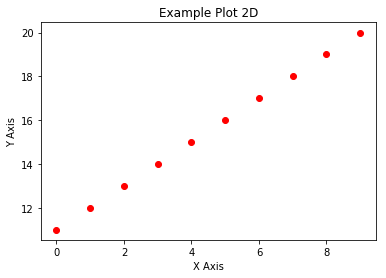

In [108]:
#plotting using the plt.scatter
plt.scatter(x,y,c='r')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Example Plot 2D')
plt.savefig('Exmaple.jpg')  #Saving the plot

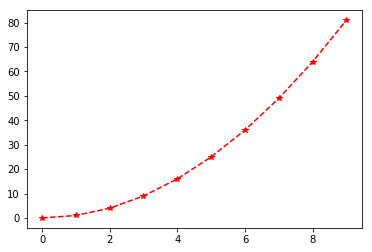

In [114]:
#plotting using plot
y=x*x
plt.plot(x,y,'r*--')

In [115]:
#Crearing subplots

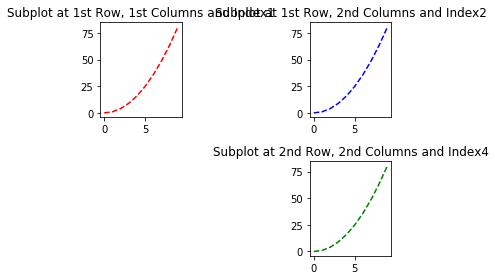

In [125]:
plt.subplot(2,2,1)
plt.plot(x,y,'r--')
plt.title('Subplot at 1st Row, 1st Columns and Index1')
plt.subplot(2,2,2)
plt.plot(x,y,'b--')
plt.title('Subplot at 1st Row, 2nd Columns and Index2')
plt.subplot(2,2,4)
plt.plot(x,y,'g--')
plt.title('Subplot at 2nd Row, 2nd Columns and Index4')

plt.tight_layout()

In [129]:
x=np.arange(1,10)
y=3*x+5
print(type(x))
print(x)
print(type(y))
print(y)

<class 'numpy.ndarray'>
[1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>
[ 8 11 14 17 20 23 26 29 32]


In [130]:
x=[1,2,3]
y=[4,6,2]

x2=[5,3,6]
y2=[9,3,9]

<BarContainer object of 3 artists>

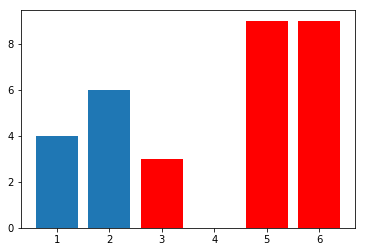

In [133]:
plt.bar(x,y)
plt.bar(x2,y2,color='r')

(array([1., 0., 2., 0., 0., 2., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
        1., 0., 1.]),
 array([12.  , 16.35, 20.7 , 25.05, 29.4 , 33.75, 38.1 , 42.45, 46.8 ,
        51.15, 55.5 , 59.85, 64.2 , 68.55, 72.9 , 77.25, 81.6 , 85.95,
        90.3 , 94.65, 99.  ]),
 <a list of 20 Patch objects>)

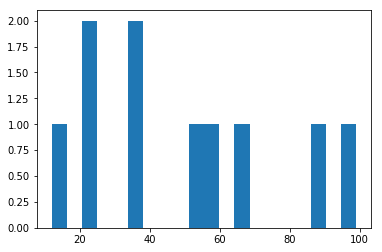

In [136]:
#Histograms
#by default 10 bins
a=np.array([12,34,22,54,67,87,34,56,23,99])
plt.hist(a,bins=20)


# BOX plots
helps in finding the percentile

{'whiskers': [<matplotlib.lines.Line2D at 0x1e1db83bd68>,
 'caps': [<matplotlib.lines.Line2D at 0x1e1db847438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e1db83b940>,
 'medians': [<matplotlib.lines.Line2D at 0x1e1db847a58>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e1db847da0>,
 'means': []}

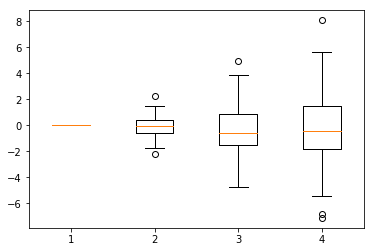

In [140]:
data=[np.random.normal(0,std,100) for std in range(0,4)]
plt.boxplot(data,patch_artist=False)
#Circle indicates the outliers in a data

# Pie Charts

([<matplotlib.patches.Wedge at 0x1e1db9c8d68>,
 [Text(0.6811847577672899, 0.8637055781836301, 'Python'),
  Text(-0.9203507630294445, 0.6024570299956002, 'Java'),
  Text(-0.5815810940777094, -1.2734847588453404, 'Ruby'),
  Text(0.9564545165255466, -0.5433182840820684, 'C++')],
 [Text(0.37155532241852174, 0.47111213355470727, '28.7%'),
  Text(-0.5020095071069697, 0.32861292545214554, '24.1%'),
  Text(-0.37387356047852743, -0.818668773543433, '30.7%'),
  Text(0.521702463559389, -0.2963554276811282, '16.4%')])

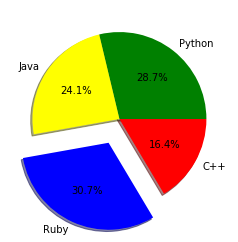

In [148]:
lables=['Python','Java','Ruby','C++']
size=[215,180,230,123]
explode=[0,0,0.3,0]
color=['green','yellow','blue','red']

plt.pie(size,explode=explode, labels=lables,colors=color,
       autopct='%1.1f%%',shadow=True)

Seaborn library
1. Distplot
2. PairPlot
3. JoinPlot


In [155]:
import seaborn as sns

In [156]:
df=sns.load_dataset('tips')

In [157]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [159]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

#Correlation with HeatMap

In [158]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


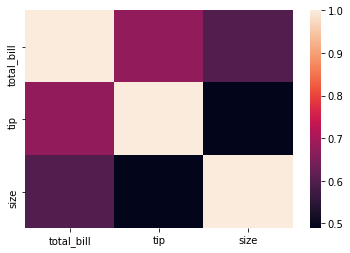

In [161]:
sns.heatmap(df.corr())

# Join Plot: 
to do the Bivariate analysis

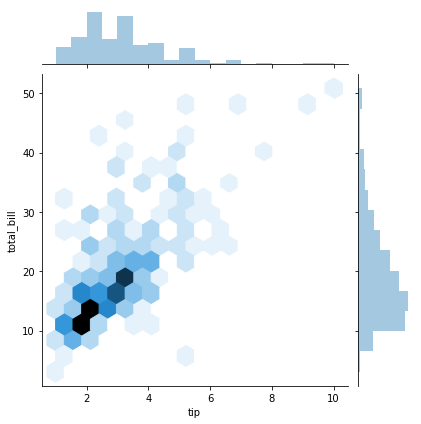

In [162]:
sns.jointplot(x='tip',y='total_bill',data=df,kind='hex')

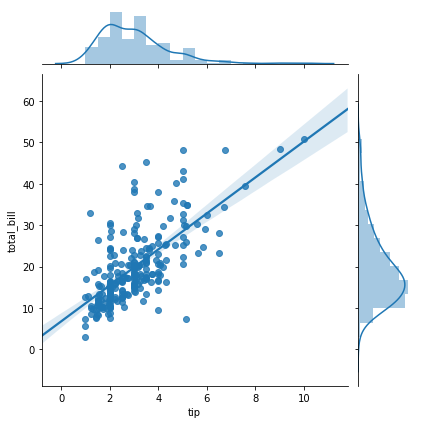

In [164]:
#The below example also draws the best fit line. KDE or PDF. Kind=regression
#draws a regression line
sns.jointplot(x='tip',y='total_bill',data=df,kind='reg')

# PAIR PLOT

also known as scatterplot

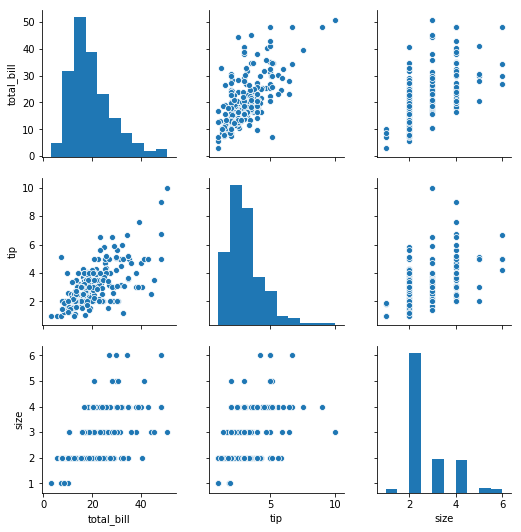

In [165]:
sns.pairplot(df)

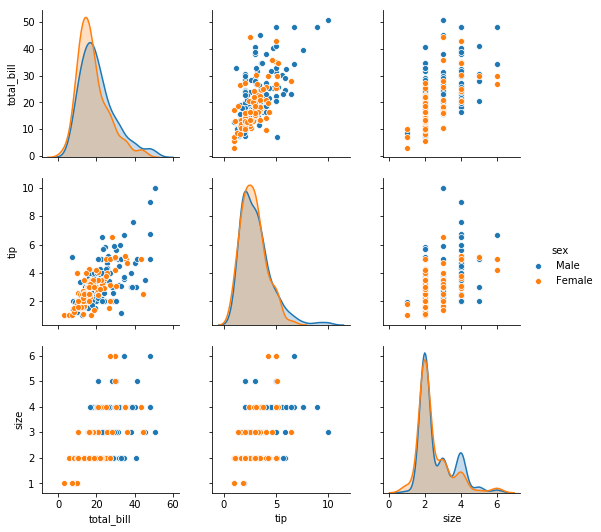

In [166]:
sns.pairplot(df,hue='sex')

# Distplots

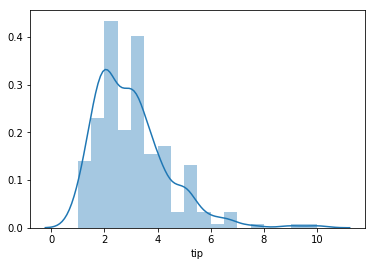

In [171]:
sns.distplot(df['tip'])

# Categorical Plots using SNS
1. Boxplot
2. voilinplot
3. countplot
4. bar plot

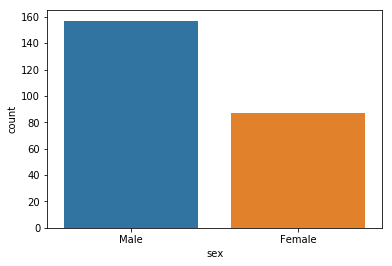

In [173]:
#CountPlot
#Number of observations in category sex of the dataset df
sns.countplot('sex',data=df)

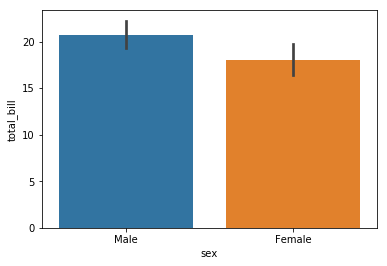

In [176]:
#Bar Plot
sns.barplot(y='total_bill',x='sex',data=df)

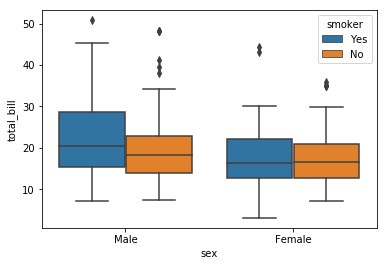

In [179]:
#Box Plot
sns.boxplot(y='total_bill',x='sex',hue='smoker', data=df)

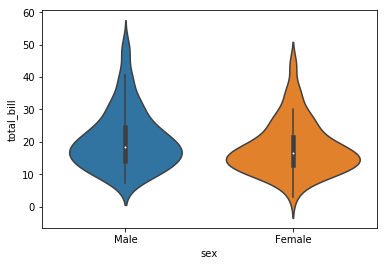

In [180]:
#Violin Plot
#Combination of boxplot and KDE(Kernel Data Estimation)

sns.violinplot(x='sex',y='total_bill', data=df)